## Final Project Submission

Please fill out:
* Student name: Tara Rosen
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: FangFang Lee 
* Blog post URL:


You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

In [1]:
# id                   Unique identifier for a house
# date                 Date house was sold
# price                Price is prediction target
# bedrooms             Number of Bedrooms/House
# bathrooms            Number of Bathrooms/Bedrooms
# sqft_living          Square Footage of the Home
# sqft_lot             Square Footage of the Lot
# floorsTotal          Floors (levels) in House
# waterfront           Waterfront view
# view                 Has Been Viewed
# condition            Overall Condition of Property
# grade                Overall Property Grade, Based on King County Grading System
# sqft_above           Above Grade Square Footage
# sqft_basement        Below Grade Square Footage
# yr_built             Year Built
# yr_renovated         Year Renovated
# zipcode              Zip Code
# lat                  Latitude Coordinate
# long                 Longitude Coordinate
# sqft_living15        Square Footage of interior housing living space for the nearest 15                            neighbors
# sqft_lot15           Square Footage of the land lots of the nearest 15 neighbors

Import Libraries and Data

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
from scipy.stats import norm
from scipy import stats
from scipy.stats import pearsonr
import numpy as np

In [3]:
housing_df = pd.read_csv('kc_house_data.csv') #imports dataset

Initial Data Analysis

Price is Our Target Variable

In [4]:
housing_df.head() #look at the first five rows of data to see what we are dealing with

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Going to drop id and date from dataset

In [5]:
housing_df = housing_df.drop(['id', 'date'], axis = 1)

In [6]:
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [9]:
housing_df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [10]:
housing_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
housing_df.dropna(inplace=True)

In [12]:
housing_df = housing_df.drop(['yr_renovated'], axis = 1)

In [13]:
housing_df['waterfront'] = housing_df.waterfront.fillna(0)  

In [14]:
# housing_df.loc[housing_df['waterfront'] > 0.0, 'y_n_waterfront']=1
# housing_df.loc[housing_df['waterfront'] == 0.0, 'y_n_waterfront']=0

In [15]:
# housing_df=housing_df.drop('waterfront', axis=1)

In [16]:
# housing_df.y_n_waterfront = housing_df.y_n_waterfront.astype('category')

In [17]:
housing_df['sqft_basement'] = housing_df.sqft_basement.replace('?', 0.0)  

In [18]:
housing_df.sqft_basement = housing_df.sqft_basement.astype('float64')

In [19]:
#housing_df.loc[housing_df['sqft_basement'] > 0.0, 'basement']=1
#housing_df.loc[housing_df['sqft_basement'] == 0.0, 'basement']=0

In [20]:
#housing_df=housing_df.drop('sqft_basement', axis=1)

In [21]:
#housing_df.basement = housing_df.basement.astype('category')

In [22]:
housing_df.price = housing_df.price.astype('int64')

In [23]:
housing_df.floors = housing_df.floors.astype('int64')

In [24]:
housing_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
housing_df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Visualization

Histograms for Categorical Variables

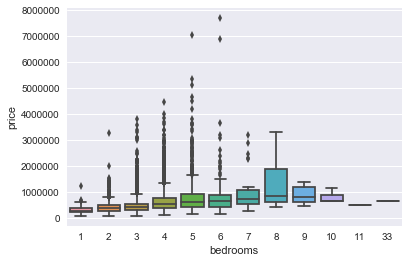

In [26]:
sns.boxplot(x=housing_df['bedrooms'], y=housing_df['price'])

In [27]:
housing_df.loc[housing_df['bedrooms'] > 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
8748,520000,11,3.00,3000,4960,2,0.0,0.0,3,7,2400,600.0,1918,98106,47.5560,-122.363,1420,4960
15856,640000,33,1.75,1620,6000,1,0.0,0.0,5,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [28]:
housing_df.loc[15856, 'bedrooms'] = 3    

In [29]:
housing_df.loc[housing_df['bedrooms'] > 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
8748,520000,11,3.0,3000,4960,2,0.0,0.0,3,7,2400,600.0,1918,98106,47.556,-122.363,1420,4960


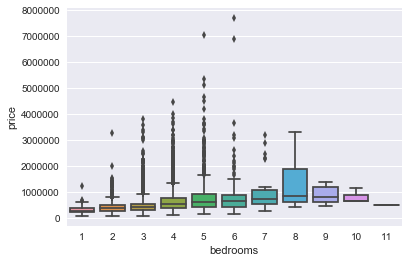

In [30]:
sns.boxplot(x=housing_df['bedrooms'], y=housing_df['price'])

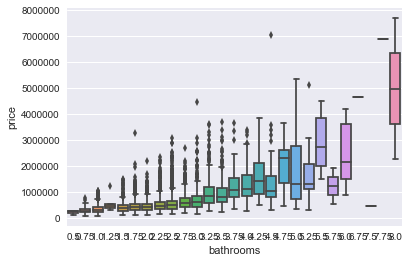

In [31]:
sns.boxplot(x=housing_df['bathrooms'], y=housing_df['price'])

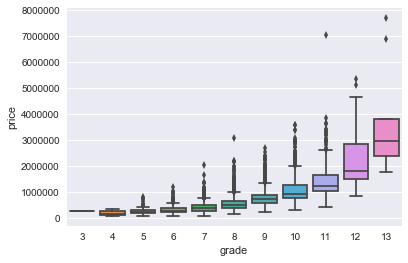

In [32]:
sns.boxplot(x=housing_df['grade'], y=housing_df['price'])

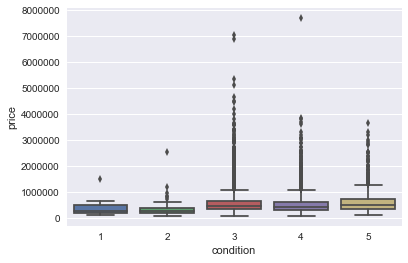

In [33]:
sns.boxplot(x=housing_df['condition'], y=housing_df['price'])

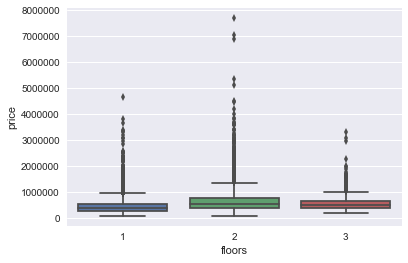

In [34]:
sns.boxplot(x=housing_df['floors'], y=housing_df['price'])

Checking for Linearity

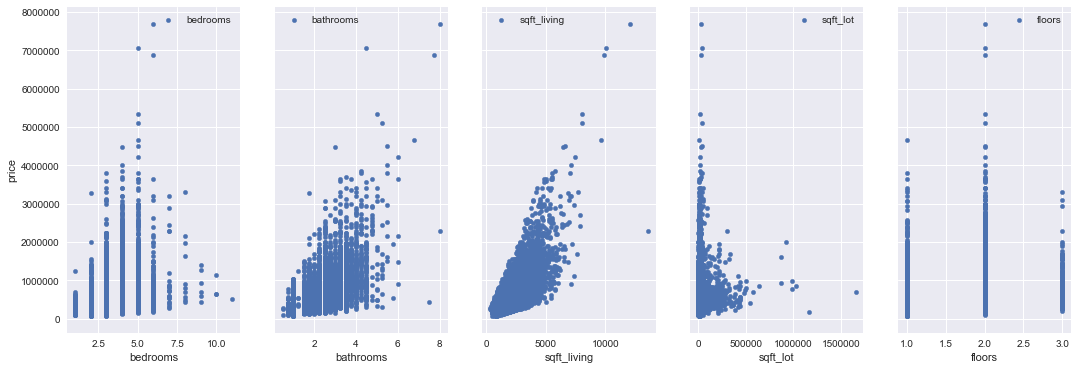

In [35]:
fig, axs = plt.subplots(1, 5, sharey = True, figsize=(18,6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors']):
    housing_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

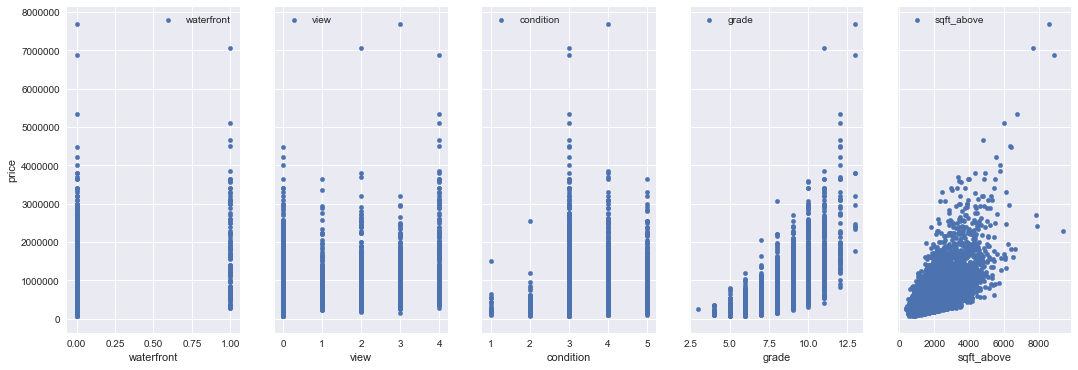

In [36]:
fig, axs = plt.subplots(1, 5, sharey = True, figsize=(18,6))
for idx, channel in enumerate(['waterfront', 'view', 'condition', 'grade', 'sqft_above']):
    housing_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

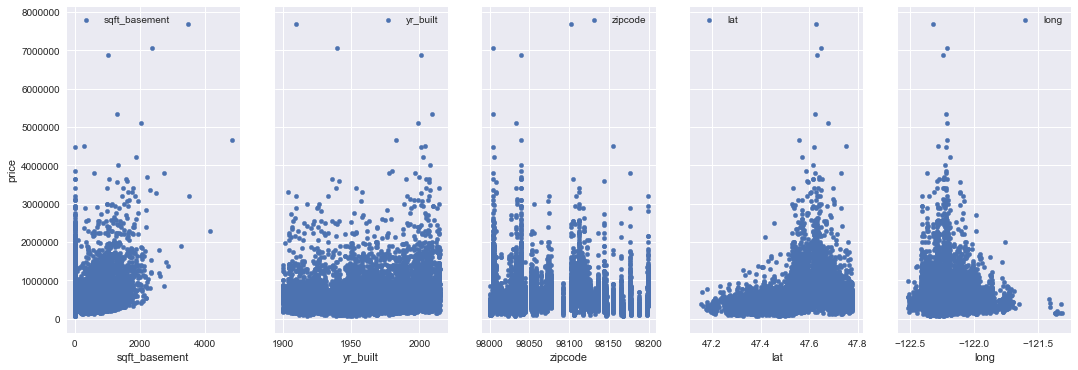

In [37]:
fig, axs = plt.subplots(1, 5, sharey = True, figsize=(18,6))
for idx, channel in enumerate(['sqft_basement', 'yr_built', 'zipcode', 'lat', 'long']):
    housing_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

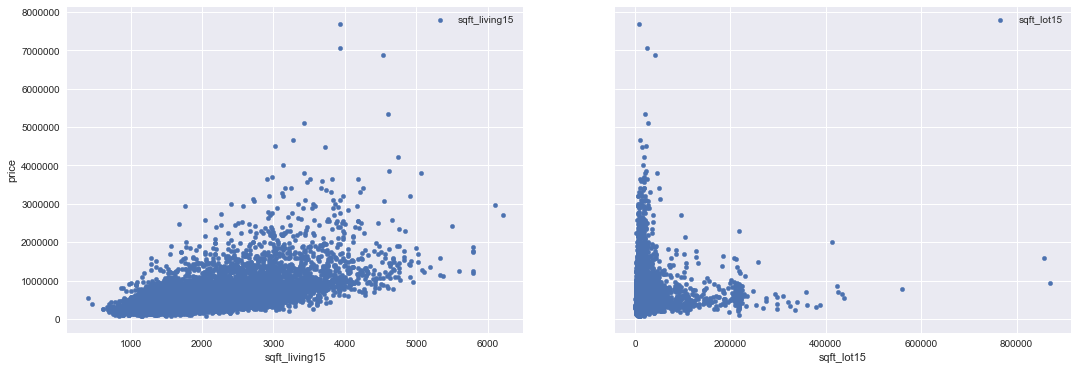

In [38]:
fig, axs = plt.subplots(1, 2, sharey = True, figsize=(18,6))
for idx, channel in enumerate(['sqft_living15','sqft_lot15']):
    housing_df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

Checking the Distributions of the Predictors for Normality

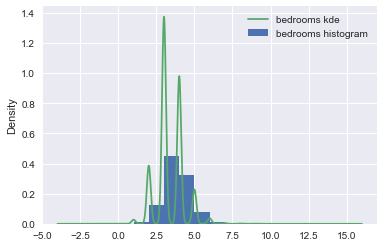

In [39]:
housing_df['bedrooms'].plot.hist(density= True, label ='bedrooms'+ ' histogram')
housing_df['bedrooms'].plot.kde(label ='bedrooms'+' kde')
plt.legend()
plt.show()

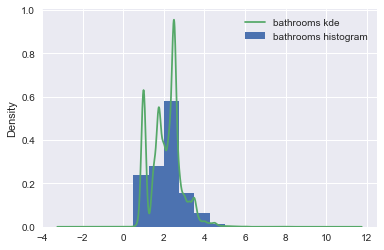

In [40]:
housing_df['bathrooms'].plot.hist(density= True, label ='bathrooms'+ ' histogram')
housing_df['bathrooms'].plot.kde(label ='bathrooms'+' kde')
plt.legend()
plt.show()

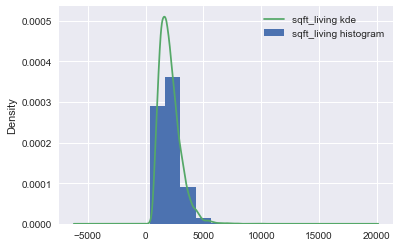

In [41]:
housing_df['sqft_living'].plot.hist(density= True, label ='sqft_living'+ ' histogram')
housing_df['sqft_living'].plot.kde(label ='sqft_living'+' kde')
plt.legend()
plt.show()

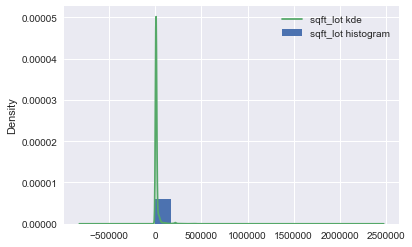

In [42]:
housing_df['sqft_lot'].plot.hist(density= True, label ='sqft_lot'+ ' histogram')
housing_df['sqft_lot'].plot.kde(label ='sqft_lot'+' kde')
plt.legend()
plt.show()

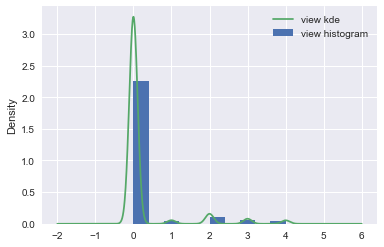

In [43]:
housing_df['view'].plot.hist(density= True, label ='view'+ ' histogram')
housing_df['view'].plot.kde(label ='view'+' kde')
plt.legend()
plt.show()

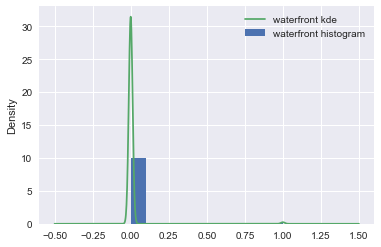

In [44]:
housing_df['waterfront'].plot.hist(density= True, label ='waterfront'+ ' histogram')
housing_df['waterfront'].plot.kde(label ='waterfront'+' kde')
plt.legend()
plt.show()

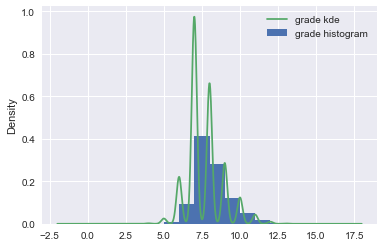

In [45]:
housing_df['grade'].plot.hist(density= True, label ='grade'+ ' histogram')
housing_df['grade'].plot.kde(label ='grade'+' kde')
plt.legend()
plt.show()

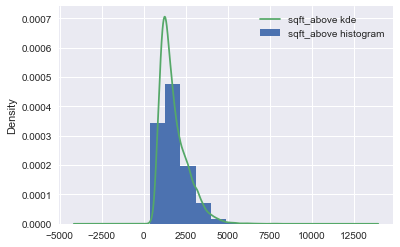

In [46]:
housing_df['sqft_above'].plot.hist(density= True, label ='sqft_above'+ ' histogram')
housing_df['sqft_above'].plot.kde(label ='sqft_above'+' kde')
plt.legend()
plt.show()

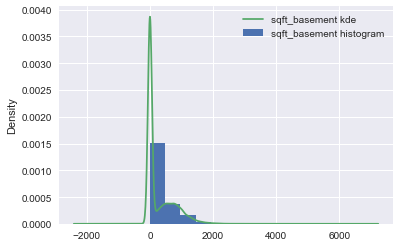

In [47]:
housing_df['sqft_basement'].plot.hist(density= True, label ='sqft_basement'+ ' histogram')
housing_df['sqft_basement'].plot.kde(label ='sqft_basement'+' kde')
plt.legend()
plt.show()

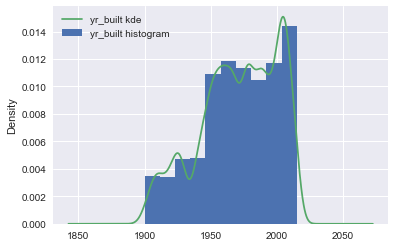

In [48]:
housing_df['yr_built'].plot.hist(density= True, label ='yr_built'+ ' histogram')
housing_df['yr_built'].plot.kde(label ='yr_built'+' kde')
plt.legend()
plt.show()

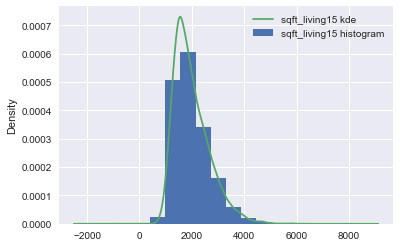

In [49]:
housing_df['sqft_living15'].plot.hist(density= True, label ='sqft_living15'+ ' histogram')
housing_df['sqft_living15'].plot.kde(label ='sqft_living15'+' kde')
plt.legend()
plt.show()

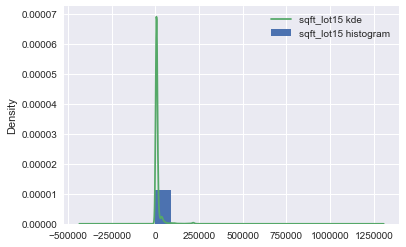

In [50]:
housing_df['sqft_lot15'].plot.hist(density= True, label ='sqft_lot15'+ ' histogram')
housing_df['sqft_lot15'].plot.kde(label ='sqft_lot15'+' kde')
plt.legend()
plt.show()

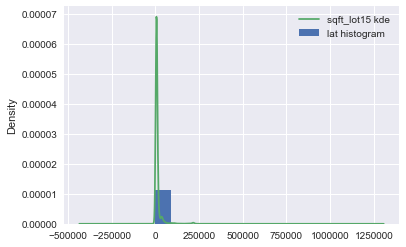

In [51]:
housing_df['sqft_lot15'].plot.hist(density= True, label ='lat'+ ' histogram')
housing_df['sqft_lot15'].plot.kde(label ='sqft_lot15'+' kde')
plt.legend()
plt.show()

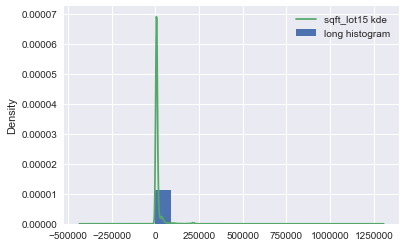

In [52]:
housing_df['sqft_lot15'].plot.hist(density= True, label ='long'+ ' histogram')
housing_df['sqft_lot15'].plot.kde(label ='sqft_lot15'+' kde')
plt.legend()
plt.show()

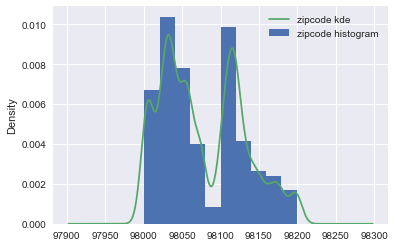

In [53]:
housing_df['zipcode'].plot.hist(density= True, label ='zipcode'+ ' histogram')
housing_df['zipcode'].plot.kde(label ='zipcode'+' kde')
plt.legend()
plt.show()

Investigate Correlation

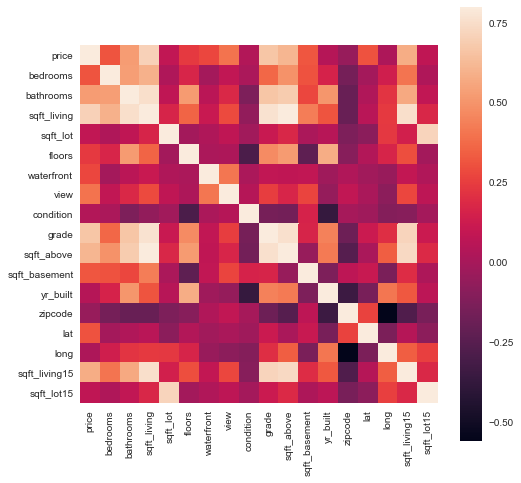

In [54]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(housing_df.corr(), vmax=.8, square=True);

In [55]:
housing_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315141,0.526155,0.706189,0.084504,0.239481,0.274212,0.396862,0.034367,0.664146,0.612014,0.316204,0.049345,-0.049502,0.306607,0.021215,0.581572,0.079402
bedrooms,0.315141,1.000000,0.530379,0.593807,0.026778,0.166831,-0.005843,0.083905,0.015618,0.367273,0.492033,0.305221,0.160078,-0.153178,-0.008066,0.135450,0.405807,0.026676
bathrooms,0.526155,0.530379,1.000000,0.753846,0.080362,0.522435,0.065688,0.180923,-0.130287,0.664748,0.685677,0.276502,0.504841,-0.199625,0.029930,0.222755,0.569290,0.081984
sqft_living,0.706189,0.593807,0.753846,1.000000,0.165336,0.357742,0.111491,0.285506,-0.062319,0.764251,0.876176,0.429486,0.314220,-0.196537,0.058394,0.239521,0.756676,0.176820
sqft_lot,0.084504,0.026778,0.080362,0.165336,1.000000,-0.010084,0.025982,0.077073,-0.016036,0.108950,0.174216,0.016740,0.051578,-0.129494,-0.084304,0.231638,0.145393,0.718489
floors,0.239481,0.166831,0.522435,0.357742,-0.010084,1.000000,0.016265,0.022869,-0.292776,0.474402,0.522831,-0.230444,0.578865,-0.096711,0.036727,0.164675,0.298564,-0.012291
waterfront,0.274212,-0.005843,0.065688,0.111491,0.025982,0.016265,1.000000,0.409773,0.016454,0.083034,0.077165,0.086743,-0.024068,0.030391,-0.015935,-0.042324,0.090588,0.029636
view,0.396862,0.083905,0.180923,0.285506,0.077073,0.022869,0.409773,1.000000,0.046354,0.248679,0.170726,0.268047,-0.056645,0.086479,0.008403,-0.078500,0.277778,0.071496
condition,0.034367,0.015618,-0.130287,-0.062319,-0.016036,-0.292776,0.016454,0.046354,1.000000,-0.147810,-0.157958,0.160627,-0.366938,0.001685,-0.022250,-0.105823,-0.096336,-0.005139
grade,0.664146,0.367273,0.664748,0.764251,0.108950,0.474402,0.083034,0.248679,-0.147810,1.000000,0.758289,0.164397,0.443286,-0.184120,0.117425,0.200680,0.717031,0.116671


In [56]:
abs(housing_df.corr()) > .70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False


In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = housing_df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [58]:
model = ols(formula= formula, data=housing_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:33:55   Log-Likelihood:            -2.1502e+05
No. Observations:               15762   AIC:                         4.301e+05
Df Residuals:                   15744   BIC:                         4.302e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.727e+06   3.47e+06      1.940      0.052   -6.91e+04    1.35e+07
bedrooms       -4.26e+04   2347.507    -18.146      0.000   -4.72e+04    -3.8e+04
bathrooms      4.885e+04   3832.641     12.745      0.000    4.13e+04    5.64e+04
sqft_living     142.9605     21.518      6.644      0.000     100.783     185.138
sqft_lot          0.0852      0.056      1.517      0.129      -0.025       0.195
floors         3963.9004   4371.703      0.907      0.365   -4605.139    1.25e+04
waterfront     6.122e+05   2.05e+04     29.851      0.000    5.72e+05    6.52e+05
view           5.284e+04   2550.914     20.713      0.000    4.78e+04    5.78e+04
condition      2.423e+04   2741.997      8.835      0.000    1.89e+04    2.96e+04
grade           9.35e+04   2569.182     36.395      0.000    8.85e+04    9.85e+04
sqft_above       52.8331     21.444      2.464      0.014      10.800      94.866
sqft_basement    14.5148     21.279      0.682      0.495     -27.195      56.225
yr_built      -2816.2538     84.424    -33.359      0.000   -2981.734   -2650.774
zipcode        -577.6046     39.011    -14.806      0.000    -654.070    -501.140
lat            6.004e+05   1.27e+04     47.354      0.000    5.76e+05    6.25e+05
long          -2.148e+05   1.56e+04    -13.810      0.000   -2.45e+05   -1.84e+05
sqft_living15    14.4605      4.091      3.535      0.000       6.441      22.480
sqft_lot15       -0.3400      0.085     -4.019      0.000      -0.506      -0.174
==============================================================================
Omnibus:                    13609.497   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1462989.398
Skew:                           3.633   Prob(JB):                         0.00
Kurtosis:                      49.635   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on collinearity with sqft_living, I am going to remove the bathrooms, grade, sqft_above, sqft_living15 features.

In [59]:
housing_df = housing_df.drop(['bathrooms', 'grade', 'sqft_above', 'sqft_living15'], axis = 1)

In [60]:
outcome = 'price'
predictors = housing_df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=housing_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2430.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:33:55   Log-Likelihood:            -2.1587e+05
No. Observations:               15762   AIC:                         4.318e+05
Df Residuals:                   15748   BIC:                         4.319e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.48e+06   3.59e+06      1.248      0.212   -2.56e+06    1.15e+07
bedrooms      -4.925e+04   2400.700    -20.514      0.000    -5.4e+04   -4.45e+04
sqft_living     316.2258      3.037    104.127      0.000     310.273     322.179
sqft_lot          0.0828      0.059      1.399      0.162      -0.033       0.199
floors         3.288e+04   4385.271      7.497      0.000    2.43e+04    4.15e+04
waterfront     5.784e+05   2.16e+04     26.750      0.000    5.36e+05    6.21e+05
view           6.772e+04   2637.033     25.679      0.000    6.25e+04    7.29e+04
condition      2.683e+04   2887.563      9.293      0.000    2.12e+04    3.25e+04
sqft_basement   -67.2785      5.100    -13.192      0.000     -77.275     -57.282
yr_built      -1760.1296     83.474    -21.086      0.000   -1923.747   -1596.512
zipcode        -701.3744     40.903    -17.147      0.000    -781.548    -621.200
lat            6.968e+05   1.32e+04     52.988      0.000    6.71e+05    7.23e+05
long          -2.827e+05   1.61e+04    -17.589      0.000   -3.14e+05   -2.51e+05
sqft_lot15       -0.3977      0.089     -4.460      0.000      -0.573      -0.223
==============================================================================
Omnibus:                    11490.854   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           703286.545
Skew:                           2.914   Prob(JB):                         0.00
Kurtosis:                      35.201   Cond. No.                     2.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#OLS Data

In [61]:
# f='sqft_living~sqft_living15'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [62]:
# f='price~bedrooms'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [63]:
# f='price~bathrooms'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [64]:
# f='price~sqft_living'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [65]:
# f='price~sqft_lot'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [66]:
# f='price~floors'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [67]:
# f='price~waterfront'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [68]:
# f='price~view'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [69]:
# f='price~condition'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [70]:
# f='price~grade'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [71]:
# f='price~sqft_above'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [72]:
# f='price~sqft_basement'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [73]:
# f='price~zipcode'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [74]:
# f='price~lat'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [75]:
# f='price~long'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [76]:
# f='price~sqft_living15'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

In [77]:
# f='price~sqft_lot15'
# model=ols(formula=f, data=housing_df).fit()
# model.summary()

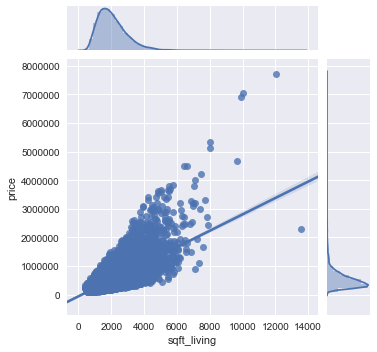

In [78]:
sns.jointplot(x="sqft_living", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

((array([-3.92163611, -3.70250258, -3.58246464, ...,  3.58246464,
          3.70250258,  3.92163611]),
  array([  370,   380,   390, ..., 10040, 12050, 13540])),
 (878.3363149920935, 2084.512371526456, 0.9559536693126227))

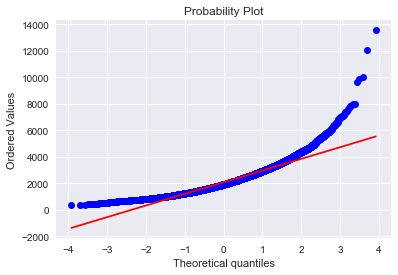

In [79]:
stats.probplot(housing_df['sqft_living'], plot=plt)

In [80]:
housing_df['sqft_living'] = np.log(housing_df['sqft_living'])

((array([-3.92163611, -3.70250258, -3.58246464, ...,  3.58246464,
          3.70250258,  3.92163611]),
  array([5.91350301, 5.94017125, 5.96614674, ..., 9.21433239, 9.39681994,
         9.51340355])),
 (0.4235697804394667, 7.5530290225431225, 0.9996957974354823))

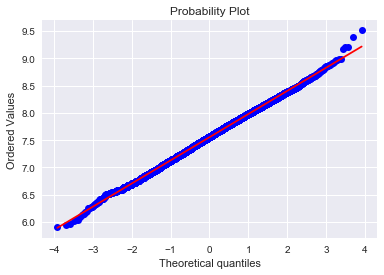

In [81]:
stats.probplot(housing_df['sqft_living'], plot=plt)

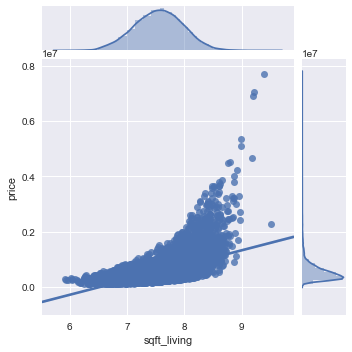

In [82]:
sns.jointplot(x="sqft_living", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [83]:
corr, p_value = pearsonr(housing_df['sqft_living'], housing_df['price'])
print(corr)
print(p_value)

0.610960040465807
0.0


((array([-3.92163611, -3.70250258, -3.58246464, ...,  3.58246464,
          3.70250258,  3.92163611]),
  array([  82000,   82500,   83000, ..., 6890000, 7060000, 7700000])),
 (311627.6090743197, 541317.1757391193, 0.8370284481506477))

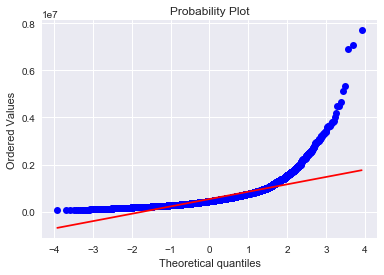

In [84]:
stats.probplot(housing_df['price'], plot=plt)

In [85]:
housing_df['price'] = np.log(housing_df['price'])

((array([-3.92163611, -3.70250258, -3.58246464, ...,  3.58246464,
          3.70250258,  3.92163611]),
  array([11.31447453, 11.32055357, 11.32659589, ..., 15.74558164,
         15.76995561, 15.85673089])),
 (0.5232564064002546, 13.04955221972992, 0.9940790955011244))

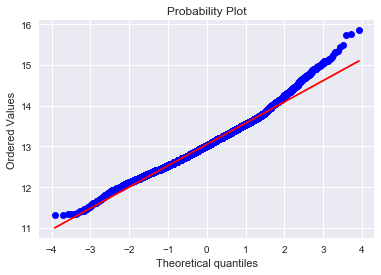

In [86]:
stats.probplot(housing_df['price'], plot=plt)

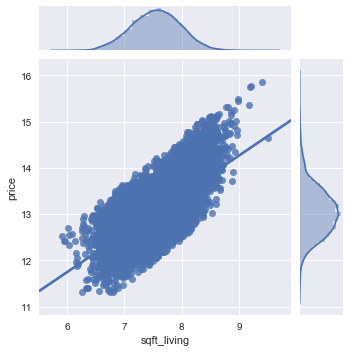

In [87]:
sns.jointplot(x="sqft_living", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

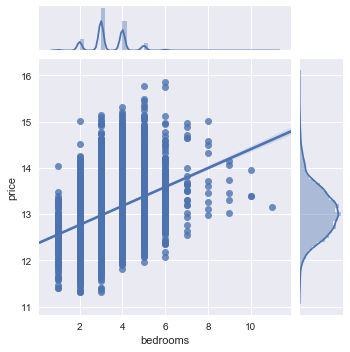

In [88]:
sns.jointplot(x='bedrooms', y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [89]:
corr, p_value = pearsonr(housing_df['bedrooms'], housing_df['price'])
print(corr)
print(p_value)

0.35177382397206225
0.0


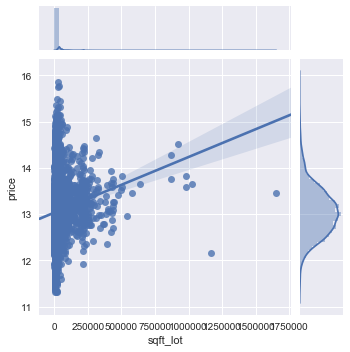

In [90]:
sns.jointplot(x="sqft_lot", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [91]:
corr, p_value = pearsonr(housing_df['sqft_lot'], housing_df['price'])
print(corr)
print(p_value)

0.09558296553054527
2.5715368442392942e-33


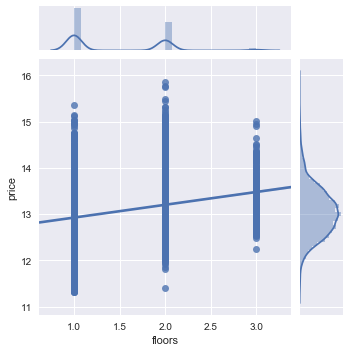

In [92]:
sns.jointplot(x="floors", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [93]:
corr, p_value = pearsonr(housing_df['floors'], housing_df['price'])
print(corr)
print(p_value)

0.28968763372282114
2.399635984046347e-302


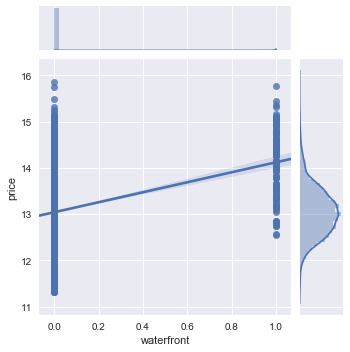

In [94]:
sns.jointplot(x="waterfront", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [95]:
corr, p_value = pearsonr(housing_df['waterfront'], housing_df['price'])
print(corr)
print(p_value)

0.17833485284823775
8.793605260321655e-113


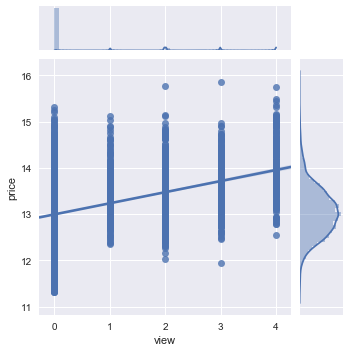

In [96]:
sns.jointplot(x="view", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [97]:
corr, p_value = pearsonr(housing_df['view'], housing_df['price'])
print(corr)
print(p_value)

0.3473639842164998
0.0


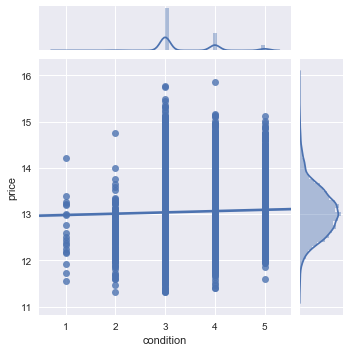

In [98]:
sns.jointplot(x="condition", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [99]:
corr, p_value = pearsonr(housing_df['condition'], housing_df['price'])
print(corr)
print(p_value)

0.034760642241579244
1.2708758882777368e-05


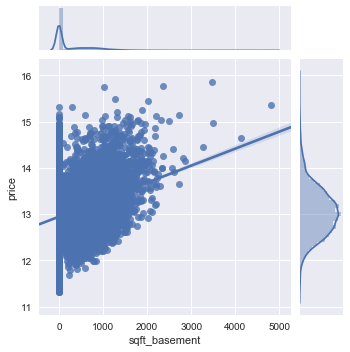

In [100]:
sns.jointplot(x="sqft_basement", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [101]:
corr, p_value = pearsonr(housing_df['sqft_basement'], housing_df['price'])
print(corr)
print(p_value)

0.30768091333594755
0.0


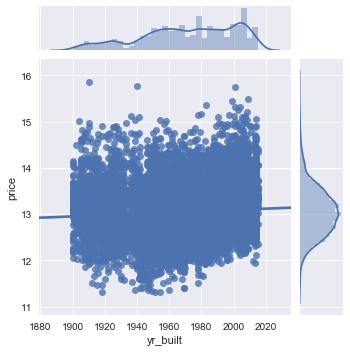

In [102]:
sns.jointplot(x="yr_built", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [103]:
corr, p_value = pearsonr(housing_df['yr_built'], housing_df['price'])
print(corr)
print(p_value)

0.07762935615545395
1.670317224402504e-22


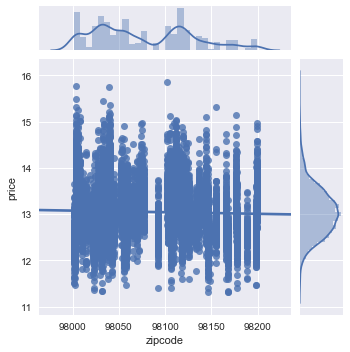

In [104]:
sns.jointplot(x="zipcode", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [105]:
corr, p_value = pearsonr(housing_df['zipcode'], housing_df['price'])
print(corr)
print(p_value)

-0.03484374253920966
1.2115326428072893e-05


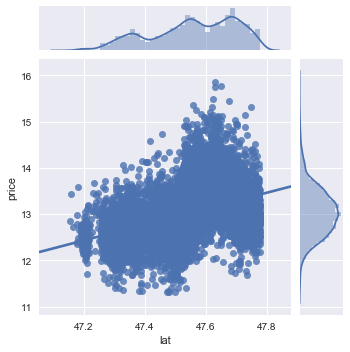

In [106]:
sns.jointplot(x="lat", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [107]:
corr, p_value = pearsonr(housing_df['lat'], housing_df['price'])
print(corr)
print(p_value)

0.4526415332413086
0.0


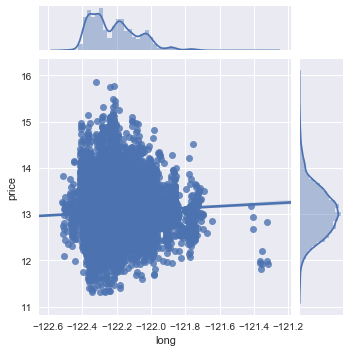

In [108]:
sns.jointplot(x="long", y="price", data=housing_df, kind = 'reg', height = 5)
plt.show()

In [109]:
corr, p_value = pearsonr(housing_df['long'], housing_df['price'])
print(corr)
print(p_value)

0.053112162494448716
2.519233739218034e-11


In [110]:
outcome = 'price'
predictors = housing_df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=housing_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2889.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:34:21   Log-Likelihood:                -2637.5
No. Observations:               15762   AIC:                             5303.
Df Residuals:                   15748   BIC:                             5410.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.3187      4.797     -1.526      0.127     -16.721       2.084
bedrooms         -0.0512      0.003    -15.301      0.000      -0.058      -0.045
sqft_living       0.8537      0.009     93.596      0.000       0.836       0.872
sqft_lot       4.985e-07   7.88e-08      6.325      0.000    3.44e-07    6.53e-07
floors            0.1139      0.006     19.558      0.000       0.102       0.125
waterfront        0.3708      0.029     12.878      0.000       0.314       0.427
view              0.1079      0.003     30.891      0.000       0.101       0.115
condition         0.0497      0.004     12.904      0.000       0.042       0.057
sqft_basement -5.332e-05   6.76e-06     -7.883      0.000   -6.66e-05   -4.01e-05
yr_built         -0.0024      0.000    -21.755      0.000      -0.003      -0.002
zipcode          -0.0009   5.45e-05    -16.160      0.000      -0.001      -0.001
lat               1.5994      0.018     91.339      0.000       1.565       1.634
long             -0.2361      0.021    -11.013      0.000      -0.278      -0.194
sqft_lot15    -1.333e-07   1.19e-07     -1.123      0.261   -3.66e-07    9.94e-08
==============================================================================
Omnibus:                      167.513   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.466
Skew:                           0.099   Prob(JB):                     7.50e-57
Kurtosis:                       3.595   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
housing_df = housing_df.drop(['sqft_lot15'], axis = 1)

In [112]:
outcome = 'price'
predictors = housing_df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=housing_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     3129.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:34:21   Log-Likelihood:                -2638.1
No. Observations:               15762   AIC:                             5302.
Df Residuals:                   15749   BIC:                             5402.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.5759      4.792     -1.581      0.114     -16.968       1.816
bedrooms         -0.0510      0.003    -15.262      0.000      -0.058      -0.044
sqft_living       0.8529      0.009     93.793      0.000       0.835       0.871
sqft_lot       4.374e-07    5.7e-08      7.671      0.000    3.26e-07    5.49e-07
floors            0.1142      0.006     19.641      0.000       0.103       0.126
waterfront        0.3706      0.029     12.870      0.000       0.314       0.427
view              0.1078      0.003     30.879      0.000       0.101       0.115
condition         0.0496      0.004     12.890      0.000       0.042       0.057
sqft_basement -5.316e-05   6.76e-06     -7.861      0.000   -6.64e-05   -3.99e-05
yr_built         -0.0024      0.000    -21.763      0.000      -0.003      -0.002
zipcode          -0.0009   5.45e-05    -16.165      0.000      -0.001      -0.001
lat               1.5998      0.018     91.378      0.000       1.566       1.634
long             -0.2384      0.021    -11.166      0.000      -0.280      -0.197
==============================================================================
Omnibus:                      166.914   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.732
Skew:                           0.098   Prob(JB):                     1.08e-56
Kurtosis:                       3.595   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Categorical Variables...

Binning...

In [113]:
# s = pd.cut(housing_df['bedrooms'], bins=[1, 3, 4, 11])
# bed_dum = pd.get_dummies(s, prefix='bedrooms')

In [114]:
# housing_df['bathrooms'].describe()

In [115]:
# s = pd.cut(housing_df['bathrooms'], bins=[.5, 1.75, 2.25, 2.5,8])
# bath_dum = pd.get_dummies(s, prefix='bathrooms')

In [116]:
# housing_df['condition'].describe()

In [117]:
# s = pd.cut(housing_df['condition'], bins=[1,2,4,5])
# condition_dum = pd.get_dummies(s, prefix='condition')

In [118]:
# housing_df['grade'].describe()

In [119]:
# s = pd.cut(housing_df['grade'], bins=[3, 7, 8, 13])
# grade_dum = pd.get_dummies(s, prefix='grade')

In [120]:
# binned_df = pd.concat([bed_dum, bath_dum, floors_dum, condition_dum, grade_dum], axis=1)

In [121]:
# joined_df = housing_df.join(binned_df, how = 'outer')

In [122]:
# joined_df = joined_df.drop(['bedrooms','bathrooms', 'condition', 'grade'], axis=1)

In [123]:
#abs(joined_df.corr()) > .75

In [124]:
#abs(housing_df.corr()) > .75

In [125]:
# housing_df = housing_df.drop(['sqft_lot15'], axis = 1)

In [126]:
#housing_df = housing_df.drop(['zipcode'], axis = 1)

In [127]:
#housing_df = housing_df.drop(['date'], axis = 1)

Splitting The Data Into Testing and Training and Running The Multiple Regression

In [128]:
X = housing_df.drop(['price'], axis=1)
y = housing_df['price']

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [130]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = housing_df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [131]:
model = ols(formula= formula, data=housing_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     3129.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:34:23   Log-Likelihood:                -2638.1
No. Observations:               15762   AIC:                             5302.
Df Residuals:                   15749   BIC:                             5402.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.5759      4.792     -1.581      0.114     -16.968       1.816
bedrooms         -0.0510      0.003    -15.262      0.000      -0.058      -0.044
sqft_living       0.8529      0.009     93.793      0.000       0.835       0.871
sqft_lot       4.374e-07    5.7e-08      7.671      0.000    3.26e-07    5.49e-07
floors            0.1142      0.006     19.641      0.000       0.103       0.126
waterfront        0.3706      0.029     12.870      0.000       0.314       0.427
view              0.1078      0.003     30.879      0.000       0.101       0.115
condition         0.0496      0.004     12.890      0.000       0.042       0.057
sqft_basement -5.316e-05   6.76e-06     -7.861      0.000   -6.64e-05   -3.99e-05
yr_built         -0.0024      0.000    -21.763      0.000      -0.003      -0.002
zipcode          -0.0009   5.45e-05    -16.165      0.000      -0.001      -0.001
lat               1.5998      0.018     91.378      0.000       1.566       1.634
long             -0.2384      0.021    -11.166      0.000      -0.280      -0.197
==============================================================================
Omnibus:                      166.914   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.732
Skew:                           0.098   Prob(JB):                     1.08e-56
Kurtosis:                       3.595   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
abs(housing_df.corr()) > .70

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,zipcode,lat,long
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False


In [133]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [134]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [135]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.0813452633994122
Test Mean Squarred Error: 0.0838891929576033


In [136]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0813452633994122
Test Mean Squarred Error: 0.0838891929576033


Evaluating the effect of train-test split size¶

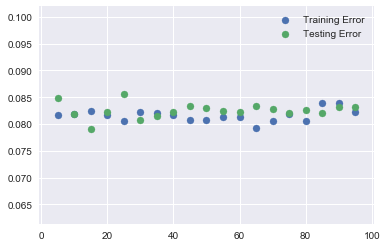

In [137]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

Evaluating the effect of train-test split size: extension

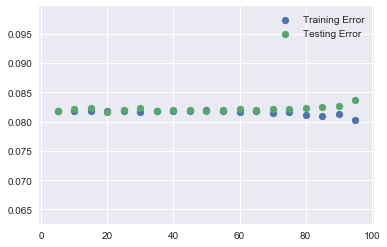

In [138]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [139]:
#housing_df = housing_df[np.isfinite(housing_df['view'])]